In [134]:
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("..")
from config import *
import math
import os
import sys
sys.path.append("..")
from config import *
#from scripts.SNR import SNR
from scripts.plot_images import plot_images
from scripts.plot_line_defect import plot_line
from scripts.Amp_phase_func import *

In [135]:
#loaded_node_temp= pd.read_pickle(Dict_temp_1)
#loaded_nodes_loc=pd.read_pickle(Nodes_loc_1)

loaded_node_1_5= pd.read_pickle(Dict_temp_1_5)
loaded_nodes_1_5=pd.read_pickle(Nodes_loc_1_5)

In [136]:
temperature =[]
# Using a loop
for key in loaded_node_1_5:
    if len(loaded_node_1_5[key]) >= 3:  # Make sure the list has at least 2 elements
        temperature .append(loaded_node_1_5[key][2])

print(temperature)

[25.0002, 25.0006, 25.0014, 25.0026, 25.0042, 25.0066, 25.0095, 25.0133, 25.0178, 25.0232, 25.0295, 25.0367, 25.045, 25.0543, 25.0646, 25.076, 25.0885, 25.1021, 25.1167, 25.1324, 25.1492, 25.1671, 25.1859, 25.2058, 25.2266, 25.2483, 25.2708, 25.294, 25.3181, 25.3427, 25.368, 25.3938, 25.42, 25.4466, 25.4733, 25.5004, 25.5275, 25.5546, 25.5817, 25.6085, 25.6352, 25.6615, 25.6875, 25.7129, 25.7377, 25.762, 25.7854, 25.8083, 25.8301, 25.8512, 25.8713, 25.8904, 25.9086, 25.9256, 25.9416, 25.9566, 25.9704, 25.9831, 25.9947, 26.0053, 26.0147, 26.0231, 26.0305, 26.0369, 26.0423, 26.0469, 26.0505, 26.0534, 26.0556, 26.0571, 26.058, 26.0584, 26.0584, 26.058, 26.0573, 26.0565, 26.0555, 26.0546, 26.0536, 26.0529, 26.0524, 26.0522, 26.0525, 26.0531, 26.0544, 26.0563, 26.0589, 26.0623, 26.0664, 26.0716, 26.0775, 26.0846, 26.0926, 26.1016, 26.1117, 26.1229, 26.1352, 26.1486, 26.1631, 26.1786, 26.1953, 26.213, 26.2318, 26.2515, 26.2721, 26.2937, 26.3161, 26.3394, 26.3633, 26.3879, 26.4131, 26.4387, 2

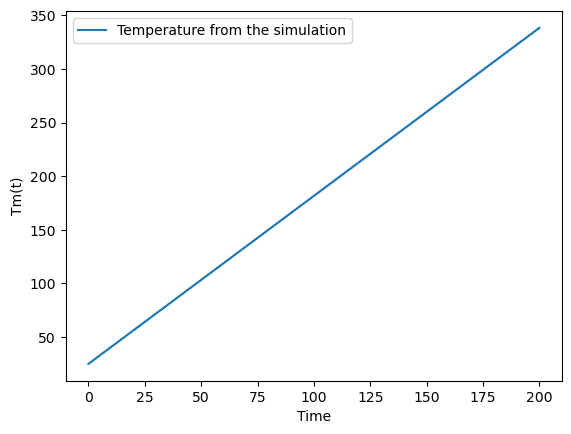

In [137]:
time= loaded_node_1_5.keys()
time = np.array(list(time), dtype=float)

plt.plot(time, temperature, label='Temperature from the simulation')
plt.xlabel('Time')
plt.ylabel('Tm(t)')
plt.legend()
plt.show()

# Numerical calculation

In [138]:
def numerical_equ(P,freq):
    
    specific_heat = 700.0  
    density = 2329.0  
    thermal_conductivity = 150.0  
    omega = 2 * np.pi*freq
    e= specific_heat * density * thermal_conductivity
    Amplitude = P /(np.sqrt( specific_heat * density * thermal_conductivity* omega))

    # Print the result
    print(f"Temperature Amplitude = {Amplitude:.5f} degrees Celsius")
    return Amplitude

In [139]:
Amplitude= numerical_equ(10000,1.5)

Temperature Amplitude = 0.20830 degrees Celsius


In [140]:
1/1.5

0.6666666666666666

# Fourier analysis

In [141]:
def fourier_analysis(f,loaded_node_temp):  
    pi = np.arccos(-1)
    # Create a dictionary of temperature data, where keys are time steps and values are temperature arrays
    
    temperature_data = loaded_node_temp

    # Determine the number of time steps and nodes
    timesteps = len(temperature_data)
    nodecount = len(next(iter(temperature_data.values())))

    # Initialize arrays for calculations
    temptab0 = np.zeros((nodecount, timesteps))
    temptab90 = np.zeros((nodecount, timesteps))
    signal0 = np.zeros(nodecount)
    signal90 = np.zeros(nodecount)

    # Loop through time steps
    for i, currenttime in enumerate(temperature_data.keys()):
        ntemp = temperature_data[currenttime]
        ntemp = np.array(ntemp)

        K0 = 2 * np.sin(2 * pi * f * currenttime - pi / 2)
        K90 = 2 * np.cos(2 * pi * f * currenttime - pi / 2)
        
        temptab0[:, i] = ntemp * K0
        temptab90[:, i] = ntemp * K90

    # Perform transpose for the arrays
    temptab0t = temptab0.T
    temptab90t = temptab90.T

    # Calculate signal0 and signal90
    signal0 = np.sum(temptab0t, axis=0) / timesteps
    signal90 = np.sum(temptab90t, axis=0) / timesteps

    # Calculate s02, s902, s02S902, and amplitude
    s02 = signal0 * signal0
    s902 = signal90 * signal90

    amplitude_DFT = np.sqrt(s02 + s902)

    phase_DFT = np.arctan2(signal90, signal0)
    return amplitude_DFT, phase_DFT


In [154]:
amplitude_DFT, phase_DFT=fourier_analysis(2,loaded_node_1_5)

In [155]:
amplitude_DFT

array([0.24935639, 0.24935696, 0.24935692, 0.24935674, 0.24935706,
       0.24935574, 0.24935637, 0.24935744, 0.24935088, 0.24934993,
       0.24935239, 0.24935191, 0.24934825, 0.24934903, 0.24935107,
       0.24935182, 0.2493545 , 0.24935293, 0.2493518 , 0.2493511 ,
       0.24934919, 0.24935286, 0.24935407, 0.24935357, 0.24935251,
       0.24935365, 0.24935637, 0.24935259, 0.24935274, 0.24935381,
       0.24935006, 0.24935007, 0.24935105, 0.24935187, 0.24935402,
       0.24935499, 0.2493532 , 0.24935615, 0.24935701, 0.24935481,
       0.24935382, 0.24935638, 0.24935733, 0.24935617, 0.24935451,
       0.24935302, 0.2493521 , 0.24935172, 0.24935799, 0.249348  ,
       0.24934881, 0.24934959, 0.24935084, 0.24935137, 0.24934792,
       0.24935166, 0.24935219, 0.24935296, 0.24935444, 0.24935596,
       0.24935738, 0.24935144, 0.24935079, 0.24934974, 0.24934879,
       0.24934803, 0.24935494, 0.2493562 , 0.24935559, 0.24935548])

In [156]:
Amplitude_Har= 0.16914
data = {
    "Numerical Equation": [Amplitude],
    "Fourier Analysis": [amplitude_DFT[0]],
    "Harmonic Analysis": [Amplitude_Har],
}

df = pd.DataFrame(data)

# Transpose the DataFrame
df = df.T
df.columns = ["Values"]

# Calculate the percentage difference in the "Error" column
df["Error"] = [0,abs(Amplitude-amplitude_DFT[0])*100,abs(Amplitude-Amplitude_Har)*100 ]

# Reset the index and rename the index column
df = df.reset_index()
df = df.rename(columns={"index": "Analysis"})

df


,Analysis,Values,Error
0,Numerical Equation,0.208298,0.000000
1,Fourier Analysis,0.249356,4.105842
2,Harmonic Analysis,0.169140,3.915797


In [145]:
#df_10000= pd.read_csv("df_10000w_m2_results.csv", index_col=False).drop("Unnamed: 0", axis=1)